***
<div class="alert alert-block alert-success">
<font color = '#006400'> 
    
# 1. Data Collection </font>    

Importing Libraries, reading Data and merging Datasets.
</div>

In [29]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read Data
demographic = pd.read_excel("Telco_customer_churn_demographics.xlsx")
location = pd.read_excel("Telco_customer_churn_location.xlsx")
population = pd.read_excel("Telco_customer_churn_population.xlsx")
services = pd.read_excel("Telco_customer_churn_services.xlsx")
status = pd.read_excel("Telco_customer_churn_status.xlsx")

In [3]:
# Display
pd.set_option('display.max_columns', None)

display(demographic.head(2))
display(location.head(2))
display(population.head(2))
display(services.head(2))
display(status.head(2))

,Customer ID,Count,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents
0,8779-QRDMV,1,Male,78,No,Yes,No,No,0
1,7495-OOKFY,1,Female,74,No,Yes,Yes,Yes,1


,Customer ID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude
0,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582
1,7495-OOKFY,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237


,ID,Zip Code,Population
0,1,90001,54492
1,2,90002,44586


,Customer ID,Count,Quarter,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
0,8779-QRDMV,1,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.0,59.65
1,7495-OOKFY,1,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.0,0,390.8,1024.10


,Customer ID,Count,Quarter,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,1,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,1,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer


In [11]:
del services['Count']
del status['Count']

In [12]:
# Merge the tables on "Customer ID"

df = demographic.merge(location, on='Customer ID', how='outer') \
                       .merge(services, on='Customer ID', how='outer') \
                       .merge(status, on='Customer ID', how='outer')

# Set "Customer ID" as an index

df.set_index('Customer ID', inplace = True)

# Display the first 2 rows of the merged table
display(df.head(2))

,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Quarter_x,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Quarter_y,Satisfaction Score,Customer Status,Churn Label,Churn Value,Churn Score,CLTV,Churn Category,Churn Reason
Customer ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Q3,No,0,1,NaN,No,0.00,No,Yes,DSL,8,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,39.65,0.0,20,0.0,59.65,Q3,3,Churned,Yes,1,91,5433,Competitor,Competitor offered more data
7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,Los Angeles,90063,"34.044271, -118.185237",34.044271,-118.185237,Q3,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Fiber Optic,17,No,Yes,No,No,No,No,No,Yes,Month-to-Month,Yes,Credit Card,80.65,633.30,0.0,0,390.8,1024.10,Q3,3,Churned,Yes,1,69,5302,Competitor,Competitor made better offer


In [13]:
# Check for duplicates
if df.duplicated().any():
    display(df[df.duplicated(keep=False)])
else:
    print("No duplicates found")

No duplicates found


  
<div class="alert alert-block alert-success">
<a id='explore'>
<font color = '#006400'> 
    
# 2. Data Exploration </font>
</a>

Understand the structure of the data and provide the first impressions of patterns, relations and errors.
    
</div>

### 2.1. Basic info and statistics

In [15]:
# Drop repeated columns "Count" and "Quarter"
df = df.drop(columns=['Quarter_x'])
df = df.rename(columns={'Quarter_y': 'Quarter'})

In [17]:
# Checking df general info in a dataframe

def df_info(data): 
    '''
    Returns a dataframe of .info() method, instead of its usual design
    
    Args: 
        data (panda dataframe) - data to analyse
    Returns: 
        pandas dataframe'''
    
    dtype_info = pd.DataFrame(data.dtypes).T.rename(index={0:'Column type'})
    missing_val_info = pd.DataFrame(data.isna().sum()).T.rename(index={0:'Count for missing values'})
    missing_val_percent_info = pd.DataFrame(data.isna().sum() / len(data)*100).T.rename(index={0:'Missing values (in %)'})
    
    tab_info = pd.concat([dtype_info, missing_val_info, missing_val_percent_info], axis=0)
    tab_info = tab_info.T.join(data.describe().T).fillna('-')
    
    return tab_info


display(df_info(df).style)

# Display shape of df:
print(f'\nThe DataFrame has {df.shape[1]} features with data from {df.shape[0]} rows.')

,Column type,Count for missing values,Missing values (in %),count,mean,std,min,25%,50%,75%,max
Gender,object,0,0.000000,-,-,-,-,-,-,-,-
Age,int64,0,0.000000,7043.000000,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
Under 30,object,0,0.000000,-,-,-,-,-,-,-,-
Senior Citizen,object,0,0.000000,-,-,-,-,-,-,-,-
Married,object,0,0.000000,-,-,-,-,-,-,-,-
Dependents,object,0,0.000000,-,-,-,-,-,-,-,-
Number of Dependents,int64,0,0.000000,7043.000000,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
Country,object,0,0.000000,-,-,-,-,-,-,-,-
State,object,0,0.000000,-,-,-,-,-,-,-,-
City,object,0,0.000000,-,-,-,-,-,-,-,-



The DataFrame has 50 features with data from 7043 rows.


In [18]:
# For qualitative features
df.describe(include='O').T

,count,unique,top,freq
Gender,7043,2,Male,3555
Under 30,7043,2,No,5642
Senior Citizen,7043,2,No,5901
Married,7043,2,No,3641
Dependents,7043,2,No,5416
Country,7043,1,United States,7043
State,7043,1,California,7043
City,7043,1106,Los Angeles,293
Lat Long,7043,1679,"33.362575, -117.299644",43
Referred a Friend,7043,2,No,3821


__Notes:__

> - There are __7043 rows__ (Clients) and __50 features__ <p>
> - There are __19 quantitative variables__ and __31 qualitative__ <p>
> - __Missing values:__ Churn Category (5174) and Churn reason (5174)  <p>
> - __Constant variables:__ Country and State have the unique values "United States" and "California" respectively; Quarter is always Q3 <p>
> - City has 1106 different values. But California only has 482 cities <p>
> - __Check if categoric values are acceptable:__ Offer has 6 possible values; Contract has 3 possivlue values; Payment Method has 3 possible values; Customer Status has 3 possible values; Churn Category has 5 possible values; Churn Reason has 20<p>
> - For age information we have two dummy variables: Under 30 and Senior Citizen <p>
> - Check if when Dependents is Yes then Number of Dependents is higher than 0 <p>

### 2.2. Further exploration 

__Skewness and Kurtosis__

> - __Skewness:__ Degree of asymmetry. Between -0.5 and 0.5 then is approx symmetric; 0 is symetric; between -1 and -0.5 or 0.5 and 1 is moderately skewed. Less than -1 or greater than 1 is highly skewed. <p>
> - __Kurtosis:__ Degree of peakedness. High kurtosis (>3) indicate a peaked distribution which could indicate the presence of outliers. <p>


__Notes:__
> - __Highly skewed:__ Number of Dependents, Number of Referrals, Avg Monthly GB Download, Total Refunds, Total Extra Data Charges, Total Long Distance Charges, Churv Value
> - __High kurtosis:__ Total Refunds, Number of Dependents, Total Extra Data Charges

In [19]:
# Compute skewness and kurtosis on numeric variables only

num_cols = df.select_dtypes(include=np.number).columns
tab_info4 = pd.DataFrame(df[num_cols].skew(), columns=['Skewness'])
tab_info5 = pd.DataFrame(df[num_cols].kurtosis(), columns=['Kurtosis'])
tab_info2 = pd.concat([tab_info4,tab_info5])
tab_info2

,Skewness,Kurtosis
Age,0.162186,NaN
Number of Dependents,2.109932,NaN
Zip Code,-0.209615,NaN
Latitude,0.314804,NaN
Longitude,-0.091932,NaN
Number of Referrals,1.446060,NaN
Tenure in Months,0.240543,NaN
Avg Monthly Long Distance Charges,0.049176,NaN
Avg Monthly GB Download,1.216584,NaN
Monthly Charge,-0.220524,NaN


__Categorical Variables - Check levels/possible values__ <p>

In [20]:
# Variable Offer

df['Offer'].value_counts()

Offer
Offer B    824
Offer E    805
Offer D    602
Offer A    520
Offer C    415
Name: count, dtype: int64

In [21]:
# Variable Contract

df['Contract'].value_counts()

Contract
Month-to-Month    3610
Two Year          1883
One Year          1550
Name: count, dtype: int64

In [22]:
# Variable Payment Method

df['Payment Method'].value_counts()

Payment Method
Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: count, dtype: int64

In [23]:
# Variable Customer Status

df['Customer Status'].value_counts()

Customer Status
Stayed     4720
Churned    1869
Joined      454
Name: count, dtype: int64

> - Stayed: customers who continued with the service; <p>
> - Churned: customers who left the service; <p>
> - Joined: new customers who joined the service during the considered period

In [24]:
# Variable Churn Category

df['Churn Category'].value_counts()

Churn Category
Competitor         841
Attitude           314
Dissatisfaction    303
Price              211
Other              200
Name: count, dtype: int64

In [25]:
# Variable Churn Reason

df['Churn Reason'].value_counts()

Churn Reason
Competitor had better devices                313
Competitor made better offer                 311
Attitude of support person                   220
Don't know                                   130
Competitor offered more data                 117
Competitor offered higher download speeds    100
Attitude of service provider                  94
Price too high                                78
Product dissatisfaction                       77
Network reliability                           72
Long distance charges                         64
Service dissatisfaction                       63
Moved                                         46
Extra data charges                            39
Limited range of services                     37
Poor expertise of online support              31
Lack of affordable download/upload speed      30
Lack of self-service on Website               29
Poor expertise of phone support               12
Deceased                                       6
Name: c

### 2.3. Visual Exploration

<div class="alert alert-block alert-info">

Numerical Variables Distributions & Outliers Analysis
</div>

**Histograms**

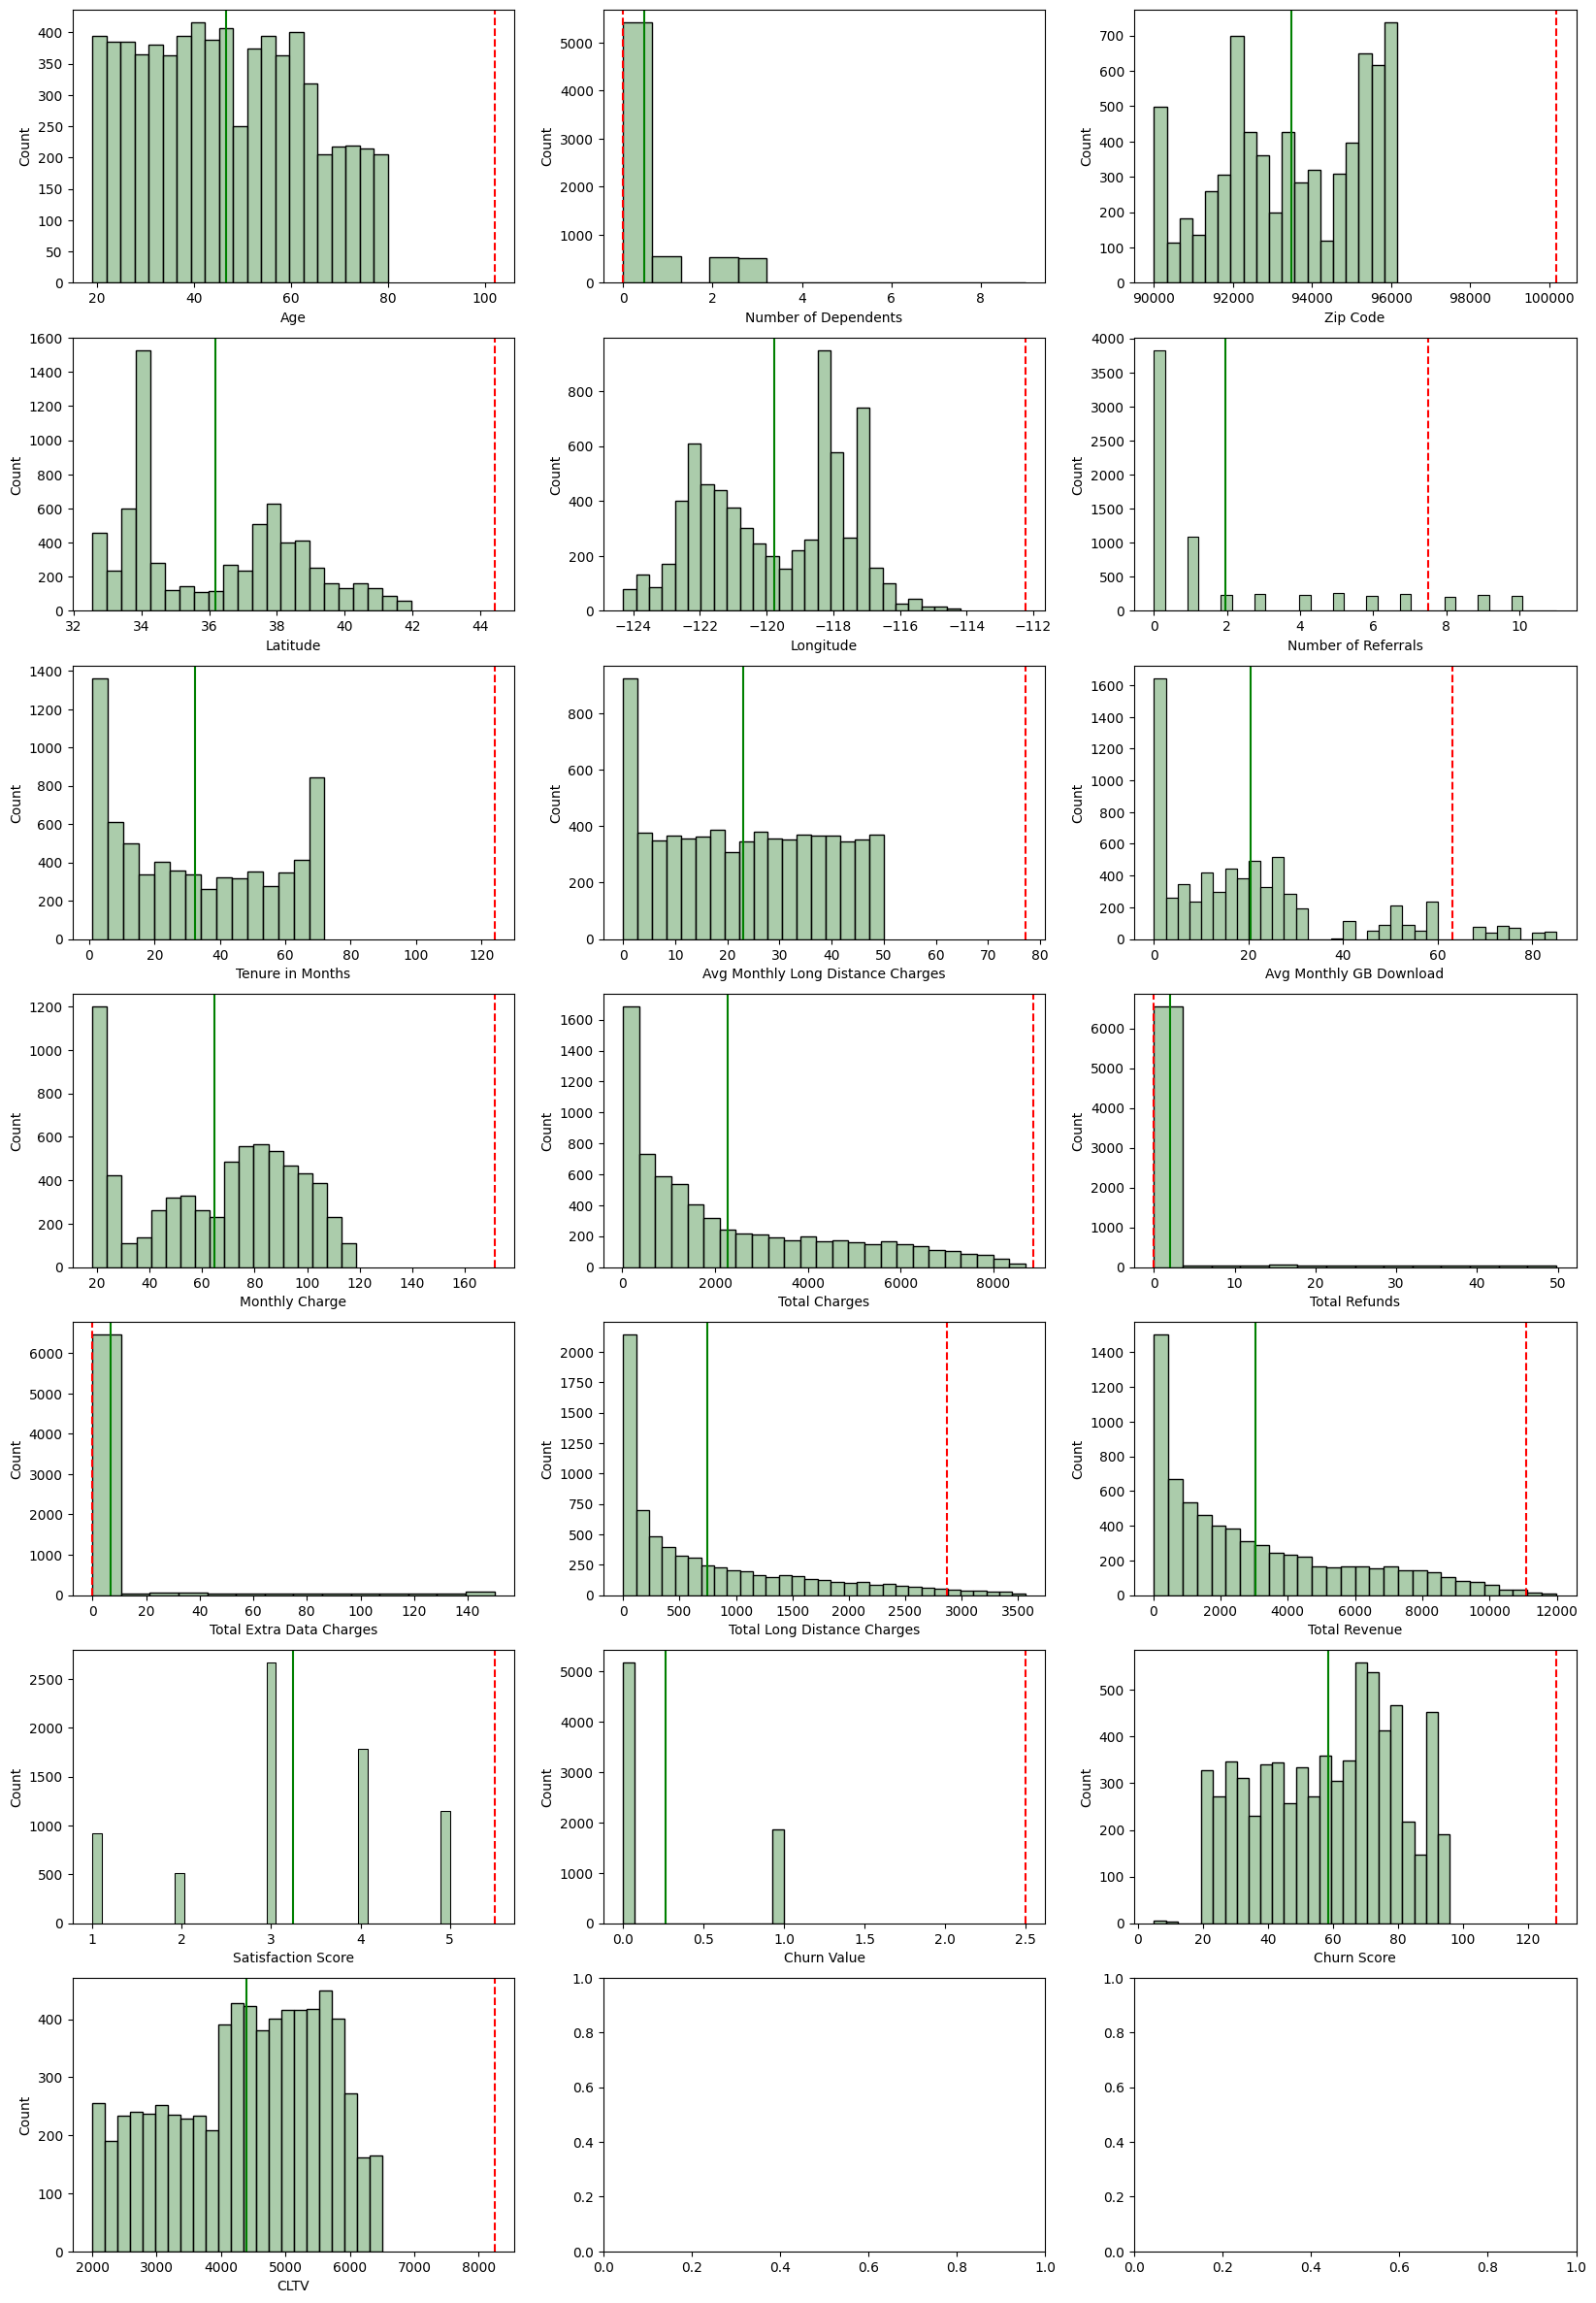

In [30]:
fig, axs = plt.subplots(nrows=7, ncols=3, figsize=(20, 30))

# Define the columns to plot
columns_numerical = columns_numerical = ['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']

for i, col in enumerate(columns_numerical):
    sns.histplot(ax=axs[i//3][i%3], data=df, x=col, color='darkseagreen')
    axs[i//3][i%3].set_xlabel(col)

    # Mark the mean and the Q3 + 1.5IQR representing red vertical lines for each subplot
    axs[i//3][i%3].axvline(df[col].mean(), color='green')
    axs[i//3][i%3].axvline(df[col].quantile(0.75) + 1.5*(df[col].quantile(0.75) - df[col].quantile(0.25)), color='red', linestyle='--')

plt.show()

**Boxplots**

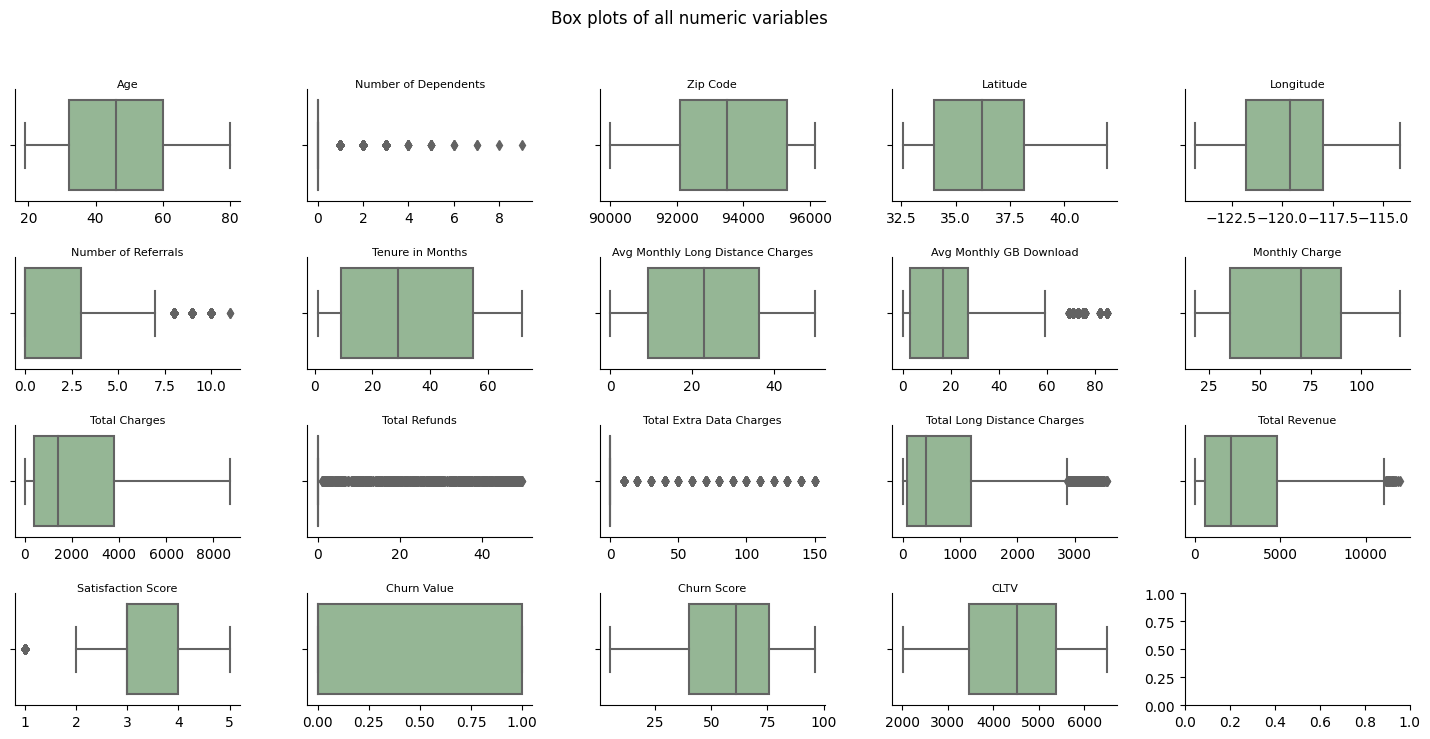

In [31]:
fig, ax = plt.subplots(4, 5, figsize=(18, 8))
for i, var in enumerate(df[['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']]):

    if i < 22:
        subplot = ax.flatten()[i]
        g = sns.boxplot(data=df,
                        x=var,
                        ax=subplot,
                        color='darkseagreen')
        subplot.set_title(var, fontsize=8, pad=1)
        subplot.set_xlabel('')
sns.despine()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle("Box plots of all numeric variables", fontsize=12)
plt.show()

**Distribution graph**

/var/folders/6q/0yfg3pwd67d3xrqsp_16lm680000gn/T/ipykernel_4963/3146473271.py:11: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(left=None, bottom=None, right=None, top=0.935, wspace=None, hspace=0.4)


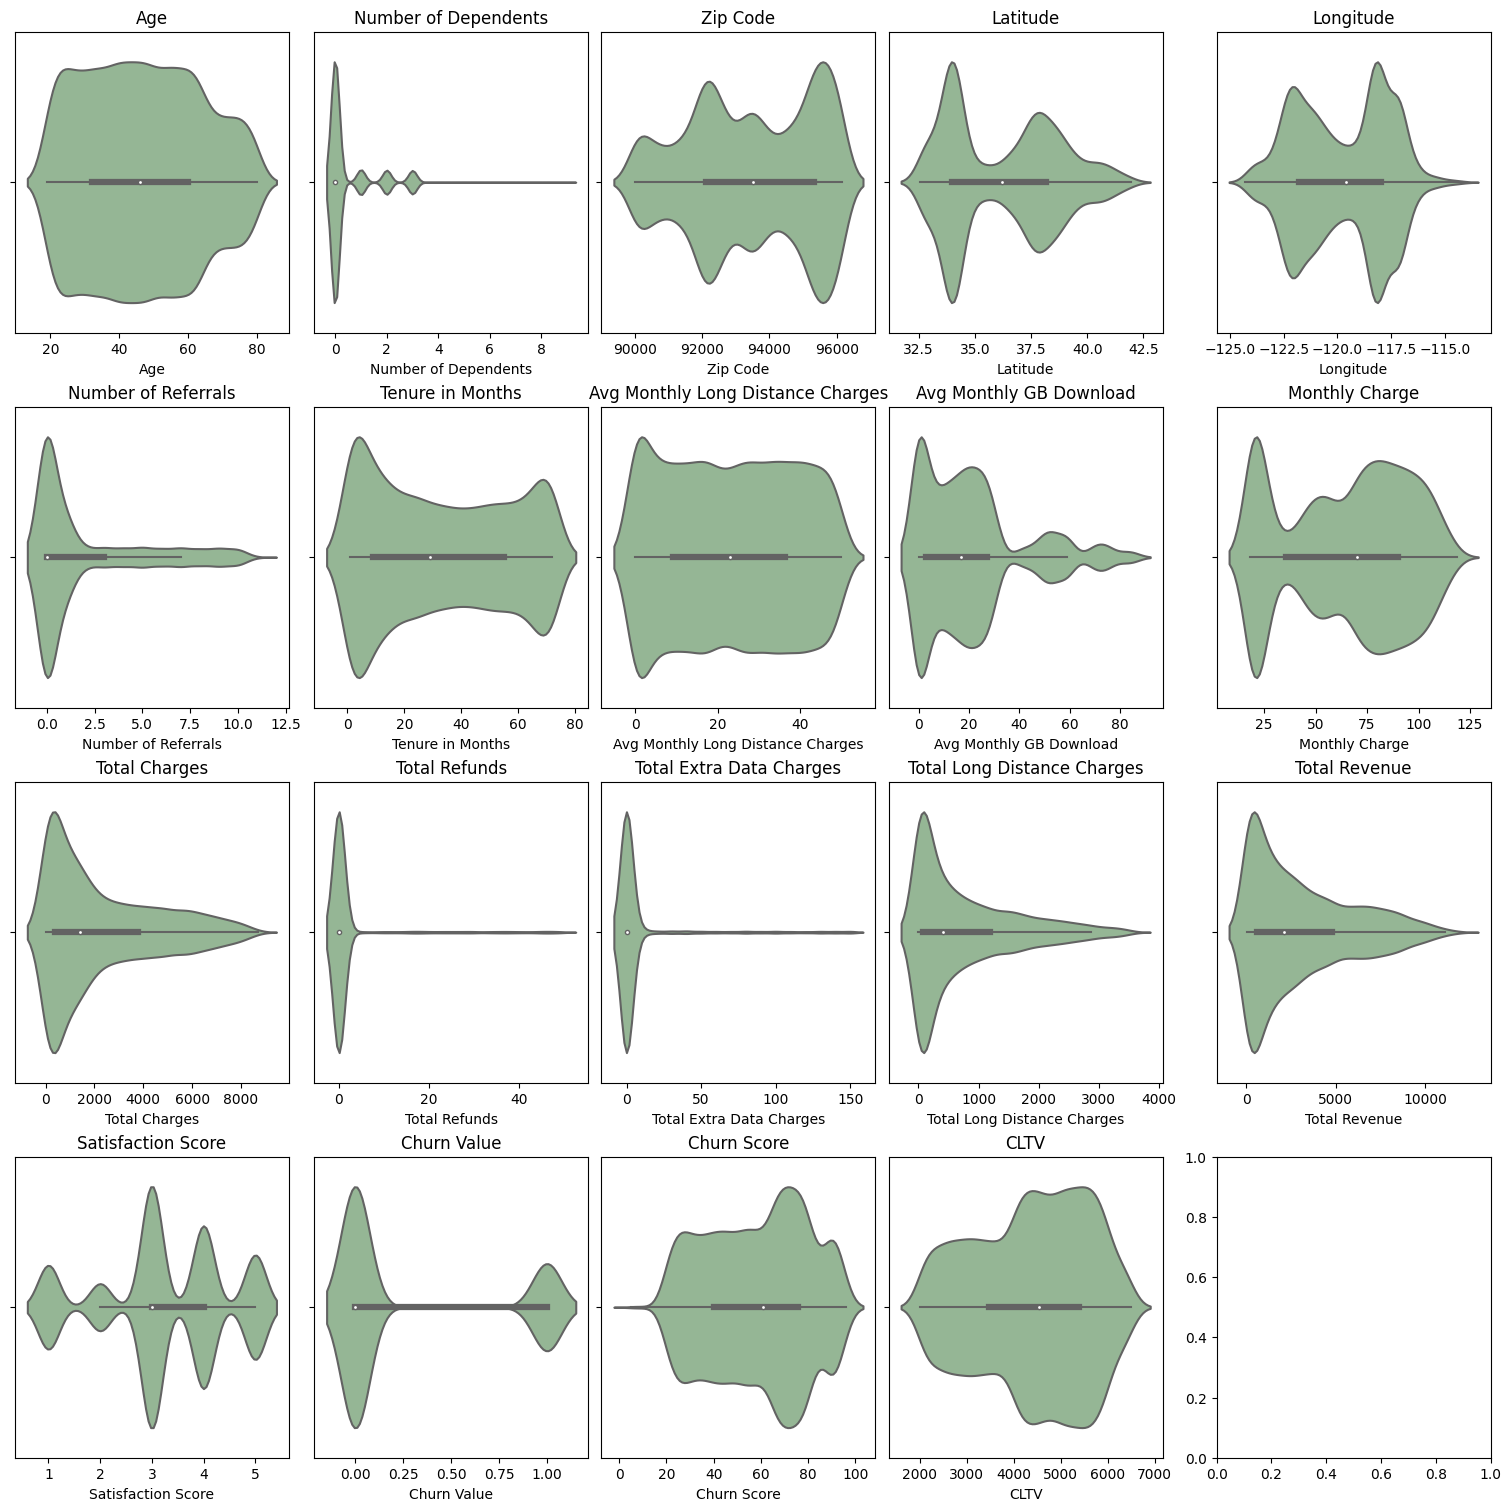

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15,15), constrained_layout=True)

for ax, var in zip(axes.flatten(), df[['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']]):
    sns.violinplot(x=var, data=df, ax=ax,color='darkseagreen')
    ax.set_title(var)
    ax.set_xlabel(var)

# Adjust the layout and show the figure
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.935, wspace=None, hspace=0.4)
plt.show()

**Outliers: IQR approach**
> * The IQR method states that values locating outside the interval **[Q1 - 1.5 * IQR, Q1 + 1.5 * IQR] are outliers**
> * Because the data is sensitive, only extreme values with IQR test will be considered for this test __by using a criterion of 3__
> * The 3(IQR) criterion tells us that any observation that falls outside the decision range is considered an extreme outlier 

In [36]:
# How many outliers are there for each  numerical variable

numerical_cols = df.select_dtypes(include=np.number).columns # Select numerical columns

q1 = df[numerical_cols].quantile(0.25)
q3 = df[numerical_cols].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df_aligned, lower_bound_aligned = df.align(lower_bound, axis=1, copy=False) # Align DataFrame and Series before comparison
_, upper_bound_aligned = df.align(upper_bound, axis=1, copy=False)

outliers = (df_aligned < lower_bound_aligned).sum() + (df_aligned > upper_bound_aligned).sum() # Calculate the number of outliers for each variable

outliers_count = outliers[outliers > 0] # Filter and print only variables which have outliers

print(outliers_count.sort_values(ascending=False))

Number of Dependents           1627
Satisfaction Score              922
Total Extra Data Charges        728
Number of Referrals             676
Total Refunds                   525
Avg Monthly GB Download         362
Total Long Distance Charges     196
Total Revenue                    21
dtype: int64


__Notes:__ 

> - Outliers (points outside the whiskers): <p>
> > -  Number of Referrals (part of the distribution) <p>
> > -  Avg Monthly GB Download (3 different distributions) <p>
> > -  Total Refunds, Total Extra Data Charges (weird distribution) <p>
> > -  Total Long Distance Charges, Total Revenue (distribution is highly skewed, outliers are part of it) <p>
> > -  Satisfaction Score (a few outliers of very low satisfaction) <p>

> - Variables 'Number of Dependents', 'Total Extra Data Charges', 'Total Refunds' show presence of **extreme outliers** (using 3*IQR criterion)   <p>



   

<div class="alert alert-block alert-info">

Numerical Variables - Correlations
    
</div>

__Spearman correlation between numerical variables:__ <p>
(data is not normally distributed)

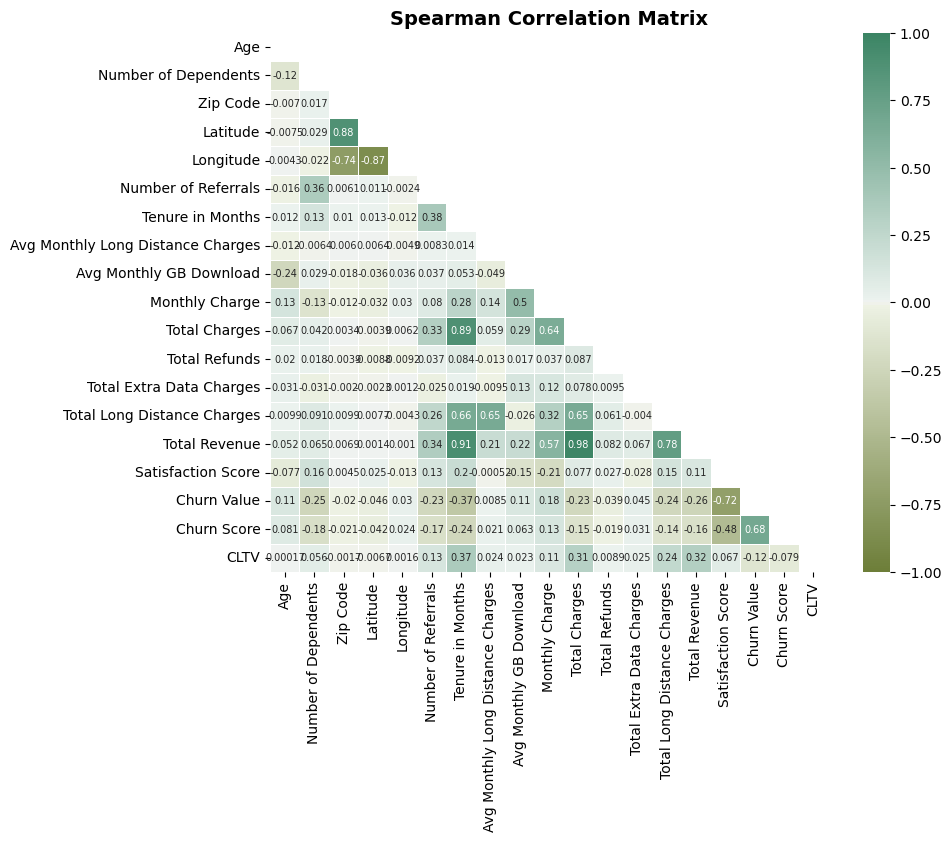

In [100]:
plt.figure(figsize=(9, 7))
custcmap = sns.diverging_palette(100, 150, as_cmap=True) 
corr = df[['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude',  'Number of Referrals',  
'Tenure in Months',  'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds',
 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'Churn Value','Churn Score', 'CLTV']].corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, linewidths=0.5, cmap=custcmap, vmin=-1, vmax=1, mask=mask, annot_kws={"fontsize":7})
plt.title('Spearman Correlation Matrix', fontsize=14, fontweight='bold')
plt.show()

In [101]:
# Variables with correlation higher than 0.7

def corr_dict(df, threshold):
    df_corr = df.corr(method = 'spearman')
    corr_dict = {}
    for i in range(len(df_corr)):
        for j in range(i+1, len(df_corr)):
            if df_corr.iloc[i,j] >= threshold:
                if df_corr.columns[i] not in corr_dict:
                    corr_dict[df_corr.columns[i]] = [(df_corr.columns[j], df_corr.iloc[i,j])]
                else:
                    corr_dict[df_corr.columns[i]].append((df_corr.columns[j], df_corr.iloc[i,j]))
            elif df_corr.iloc[i,j] <= -threshold:
                if df_corr.columns[i] not in corr_dict:
                    corr_dict[df_corr.columns[i]] = [(df_corr.columns[j], df_corr.iloc[i,j])]
                else:
                    corr_dict[df_corr.columns[i]].append((df_corr.columns[j], df_corr.iloc[i,j]))
    return corr_dict

corr_dict(df, 0.7)

{'Zip Code': [('Latitude', 0.8798232020426234),
  ('Longitude', -0.7415155022458879)],
 'Latitude': [('Longitude', -0.8695458835292985)],
 'Tenure in Months': [('Total Charges', 0.8894757959233502),
  ('Total Revenue', 0.9126474143808789)],
 'Total Charges': [('Total Revenue', 0.9783658853799454)],
 'Total Long Distance Charges': [('Total Revenue', 0.7775012768341926)],
 'Satisfaction Score': [('Churn Value', -0.7172652074308468)]}

__Notes:__ 

High correlations (>0.7) exist for the following variables (except Zip Code, Latitude & Longitude):<p>
>- Tenure in Months:
>>    - Total Charges
>>    - Total Revenue

If tenure is high (customer has been with the company for more months), then the more he can be charged and hence total revenue is also higher

>- Total Charges:
>>    - Total Revenue<p>

Same logic. More charges -> more revenue generates

>- Total Long Distance Charges:
>>    - Total Revenue<p>

If long-distance charges are high, customers ahave additionally chagers above those specified in their plan, which directly results in an increase in total revenue 

>- Satisfaction Score:
>>    - Churn Value<p>

Customers less satisfied are more likely to churn. Negative correlation might be expected.

<div class="alert alert-block alert-info">

Categorical Variables
    
</div>

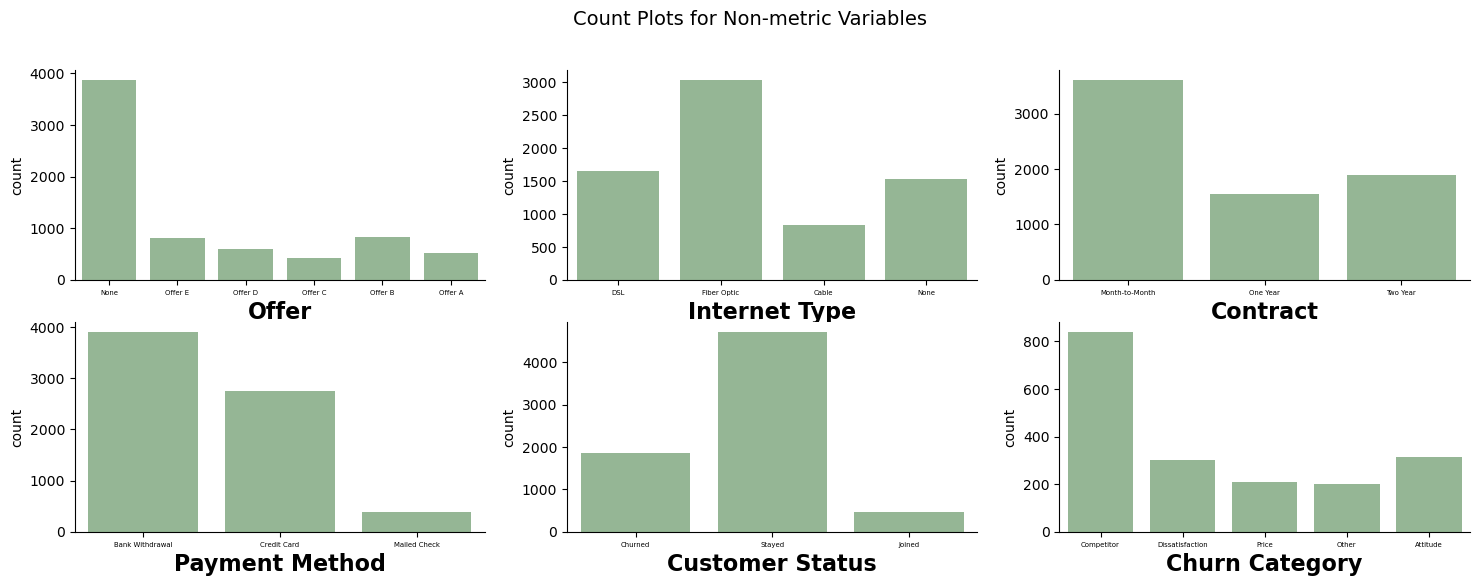

In [118]:
categorical_data = ['Offer', 'Internet Type', 'Contract', 'Payment Method','Customer Status', 'Churn Category']


# Count plots for non-numerical variables
fig, ax = plt.subplots(2, 3, figsize=(18, 6))
for var, subplot in zip(categorical_data, ax.flatten()):
    sns.countplot(data=df, x=var, ax=subplot, color='darkseagreen')
    subplot.set_xlabel(var.replace('_', ' '), fontsize=16, fontweight='bold')
    subplot.tick_params(axis='x', labelsize=5)

# Decoration
sns.despine()
fig.suptitle("Count Plots for Non-metric Variables", fontsize=14)
plt.show()

### 2.4. In-depth Exploration

Churn Customers - descriptive statistics focused on this subset

Analyse service bundles - which things are bought together

Revenues & Charges Analysis: <p>

- Total Revenue = Total Charges - Total Refunds + Total Extra Data Charges + Total Long Distance Charges 

<div class="alert alert-block alert-success">
<font color = '#006400'> 
    
# 3. Data Pre Processing </font>
</a>
    
</div>

### 3.1. Misclassifications

In [119]:
# City

### 3.2. Variables Creation (To brainstorm)

> 1 - __Tenure Groups__ - Derived from 'Tenure in Months' into groups like '0-6months', '7-12 months', etc. to help identify if newer customers are churning more than older ones <p>
> 2 - __Average Monthly Charges__ - 'Total Charges' divided by 'Tenure in Months' to give a clearer picture than the existing monthly charge <p>
> 3 - __Engagement Score__ - Create a score based on the number of services a customer has subscribed to. The more services, the higher the engagement score. <p>
> 4 - __Population Density__ - Segment zip codes into 'High', 'Medium', 'Low' based on population to help analyse if customers from densely populated areas behave differently<p>

Rates/constants:
> 5 - __Offer Acceptance Rate__ - Number of customers who accepted an offer divided by total customers (constant) <p>
> 6 - __Referral Rate__ - Number of successful referrals divided by number of referrals made <p>

Others: <p>
- bill shock to flag difference between two consecutive months' bills to see if there are big jumps<p>
- utilization rate = avg monthly gb downlod / limit set in their plan<p>